In [5]:
!pip install opencv-python

  Using cached opencv_python-4.13.0.92-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
    --------------------------------------- 0.5/40.2 MB 134.2 kB/s eta 0:04:56
 


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import kagglehub
import cv2
import glob
import matplotlib.pyplot as plt
import os
import random
import numpy as np

C:\Users\KIIT0001\Desktop\AD\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Download dataset
path = kagglehub.dataset_download("pavansanagapati/images-dataset")

print("Dataset path:", path)


100%|██████████| 1.01G/1.01G [03:36<00:00, 5.02MB/s]

Extracting files...


Dataset path: C:\Users\KIIT0001\.cache\kagglehub\datasets\pavansanagapati\images-dataset\versions\1


In [8]:
def load_random_image(folder_keyword):
    images = glob.glob(os.path.join(path, "**", f"*{folder_keyword}*.*"), recursive=True)
    if not images:
        raise Exception(f"No images found for keyword: {folder_keyword}")
    img_path = random.choice(images)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, img_path


In [9]:
def display(title, before, after):
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(before)
    plt.title(f"{title} - Before")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(after)
    plt.title(f"{title} - After")
    plt.axis("off")

    plt.show()

In [10]:
def translate(image, shift_x=0, shift_y=0):
    rows, cols = image.shape[:2]

    # Correct transformation matrix
    M = np.float32([
        [1, 0, shift_x],
        [0, 1, shift_y]
    ])

    return cv2.warpAffine(image, M, (cols, rows))

In [11]:
def rotate(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)

    M = cv2.getRotationMatrix2D(center, angle, 1)

    return cv2.warpAffine(image, M, (cols, rows))

In [12]:
# ---------------------------------------------------
# Load Images
# ---------------------------------------------------

cat_img, cat_path = load_random_image("cat")
dog_img, dog_path = load_random_image("dog")

print("Selected Cat Image:", cat_path)
print("Selected Dog Image:", dog_path)

Selected Cat Image: C:\Users\KIIT0001\.cache\kagglehub\datasets\pavansanagapati\images-dataset\versions\1\data\data\cats\cat.3.jpg
Selected Dog Image: C:\Users\KIIT0001\.cache\kagglehub\datasets\pavansanagapati\images-dataset\versions\1\data\dogs\dog.166.jpg


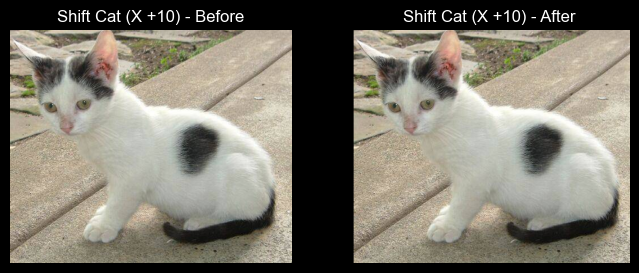

In [13]:
# ---------------------------------------------------
# 1(a) Shift Cat by 10 units along X-axis
# ---------------------------------------------------

cat_shift_x = translate(cat_img, shift_x=10)
display("Shift Cat (X +10)", cat_img, cat_shift_x)

# ---------------------------------------------------
# 1(b) Shift Dog by 20 units along Y-axis
# ---------------------------------------------------

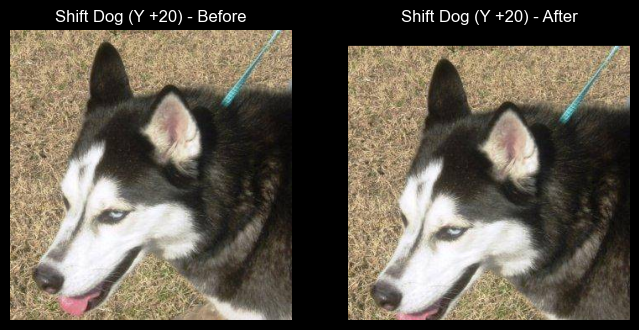

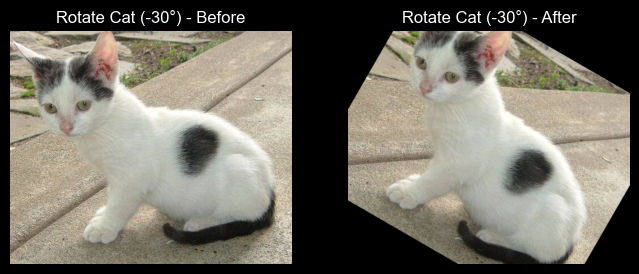

In [14]:
dog_shift_y = translate(dog_img, shift_y=20)
display("Shift Dog (Y +20)", dog_img, dog_shift_y)

# ---------------------------------------------------
# 1(c) Rotate Cat by -30 degrees
# ---------------------------------------------------

cat_rotated = rotate(cat_img, -30)
display("Rotate Cat (-30°)", cat_img, cat_rotated)

# ---------------------------------------------------
# 1(d) Rotate Dog by 154 degrees
# ---------------------------------------------------

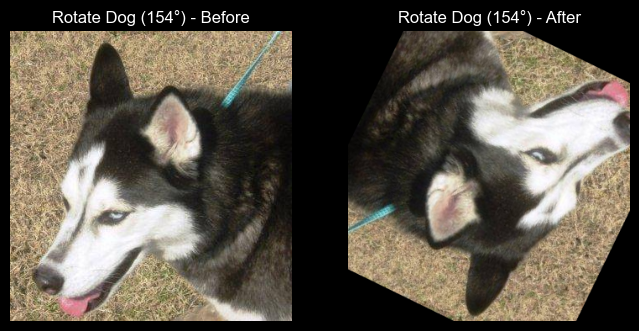

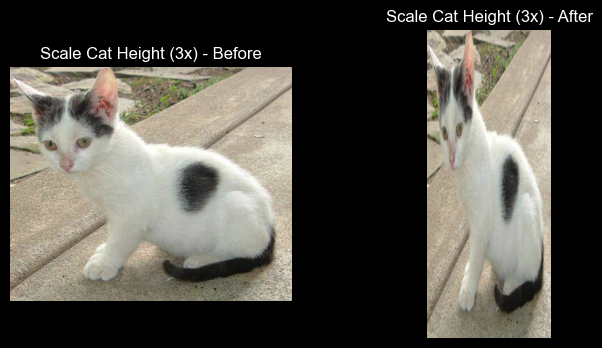

In [15]:
dog_rotated = rotate(dog_img, 154)
display("Rotate Dog (154°)", dog_img, dog_rotated)

# ---------------------------------------------------
# 1(e) Increase Height of Cat to 3x
# ---------------------------------------------------

rows, cols = cat_img.shape[:2]
cat_scaled_height = cv2.resize(cat_img, (cols, rows * 3))
display("Scale Cat Height (3x)", cat_img, cat_scaled_height)

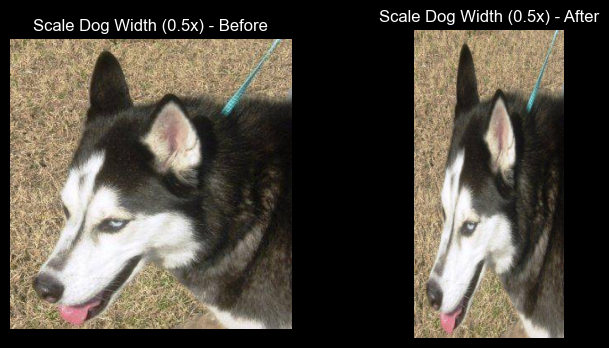

In [16]:
# ---------------------------------------------------
# 1(f) Decrease Width of Dog to Half
# ---------------------------------------------------

rows, cols = dog_img.shape[:2]
dog_scaled_width = cv2.resize(dog_img, (cols // 2, rows))
display("Scale Dog Width (0.5x)", dog_img, dog_scaled_width)

Selected Cat Image: C:\Users\KIIT0001\.cache\kagglehub\datasets\pavansanagapati\images-dataset\versions\1\data\data\cats\cat.13.jpg
Selected Dog Image: C:\Users\KIIT0001\.cache\kagglehub\datasets\pavansanagapati\images-dataset\versions\1\data\data\dogs\dog.7.jpg


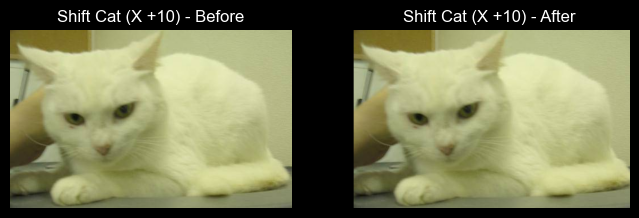

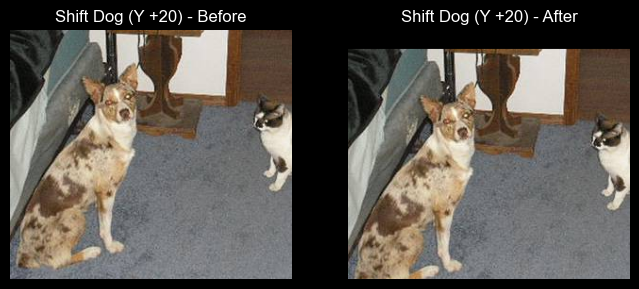

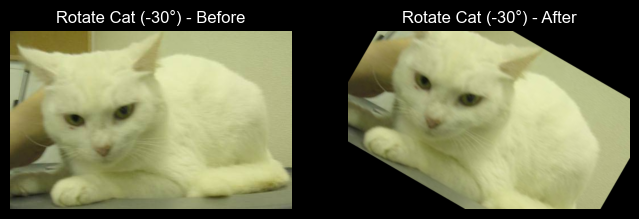

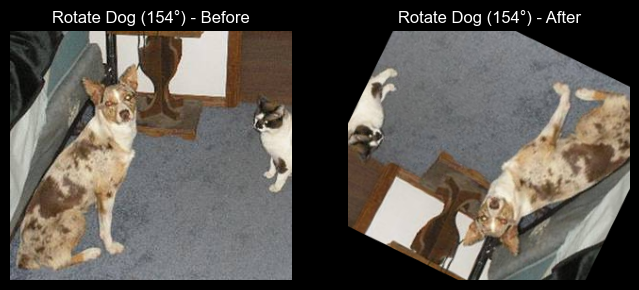

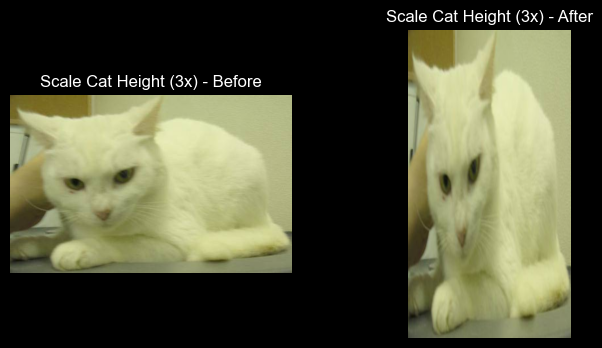

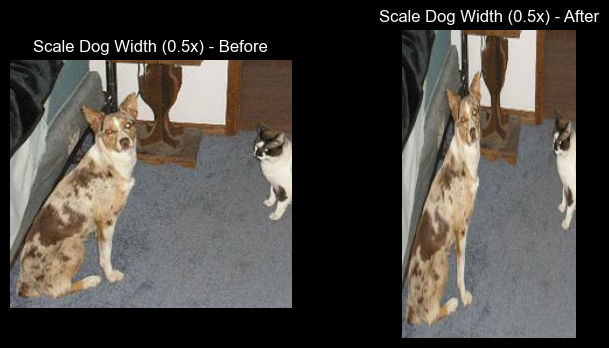

In [17]:
# ---------------------------------------------------
# Load Images
# ---------------------------------------------------

cat_img, cat_path = load_random_image("cat")
dog_img, dog_path = load_random_image("dog")

print("Selected Cat Image:", cat_path)
print("Selected Dog Image:", dog_path)

# ---------------------------------------------------
# 1(a) Shift Cat by 10 units along X-axis
# ---------------------------------------------------

cat_shift_x = translate(cat_img, shift_x=10)
display("Shift Cat (X +10)", cat_img, cat_shift_x)

# ---------------------------------------------------
# 1(b) Shift Dog by 20 units along Y-axis
# ---------------------------------------------------

dog_shift_y = translate(dog_img, shift_y=20)
display("Shift Dog (Y +20)", dog_img, dog_shift_y)

# ---------------------------------------------------
# 1(c) Rotate Cat by -30 degrees
# ---------------------------------------------------

cat_rotated = rotate(cat_img, -30)
display("Rotate Cat (-30°)", cat_img, cat_rotated)

# ---------------------------------------------------
# 1(d) Rotate Dog by 154 degrees
# ---------------------------------------------------

dog_rotated = rotate(dog_img, 154)
display("Rotate Dog (154°)", dog_img, dog_rotated)

# ---------------------------------------------------
# 1(e) Increase Height of Cat to 3x
# ---------------------------------------------------

rows, cols = cat_img.shape[:2]
cat_scaled_height = cv2.resize(cat_img, (cols, rows * 3))
display("Scale Cat Height (3x)", cat_img, cat_scaled_height)

# ---------------------------------------------------
# 1(f) Decrease Width of Dog to Half
# ---------------------------------------------------

rows, cols = dog_img.shape[:2]
dog_scaled_width = cv2.resize(dog_img, (cols // 2, rows))
display("Scale Dog Width (0.5x)", dog_img, dog_scaled_width)
